In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the Ride Data
ride_df= pd.read_csv(ride_data_to_load,encoding = "ISO-8859-1")
ride_df= ride_df.drop_duplicates()
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Read the City Data
city_df= pd.read_csv(city_data_to_load,encoding="ISO-8859-1")
city_df= city_df.drop_duplicates()
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#merge two data by city

citymerge_df= pd.merge(city_df,ride_df,on="city")
citymerge_df= citymerge_df.drop_duplicates()
citymerge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
# Average fare per city# Averag 
average_fare= citymerge_df.groupby(["city"]).mean()["fare"].rename("Average Fare")
average_fare_df=pd.DataFrame(average_fare)
average_fare_df.reset_index(level=0,inplace=True)
average_fare_df.round(1)

,city,Average Fare
0,Amandaburgh,24.6
1,Barajasview,25.3
2,Barronchester,36.4
3,Bethanyland,33.0
4,Bradshawfurt,40.1
5,Brandonfort,35.4
6,Carriemouth,28.3
7,Christopherfurt,24.5
8,Colemanland,30.9
9,Davidfurt,32.0


In [6]:
#Total number of rides per city
Total_rides=citymerge_df.groupby(["city"]).count()["ride_id"].rename("Total Rides")
Total_rides_df=pd.DataFrame(Total_rides)
Total_rides_df.reset_index(level=0,inplace=True)
Total_rides_df.head()

,city,Total Rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [7]:
# Total number of drivers per city
Total_driver= city_df.groupby(["city"]).sum()["driver_count"].rename("Total Number of Driver")
Total_driver_df=pd.DataFrame(Total_driver)
Total_driver_df.reset_index(level=0,inplace=True)
Total_driver_df.head()

,city,Total Number of Driver
0,Amandaburgh,12
1,Barajasview,26
2,Barronchester,11
3,Bethanyland,22
4,Bradshawfurt,7


In [8]:
# Seperate City Type (Urban, Suburban, Rural)
city_type= city_df[["city","type"]]
city_type.head()

,city,type
0,Richardfort,Urban
1,Williamsstad,Urban
2,Port Angela,Urban
3,Rodneyfort,Urban
4,West Robert,Urban


In [9]:
#create a summary table with city, average fare, total ride, driver count and city type
summary_table_df= pd.merge(average_fare_df,Total_rides_df,on="city")
summary_table_df=pd.merge(summary_table_df,Total_driver_df, on= "city")
summary_table_df=pd.merge(summary_table_df,city_type,on="city")
summary_table_df.head()

,city,Average Fare,Total Rides,Total Number of Driver,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


(0, 40)

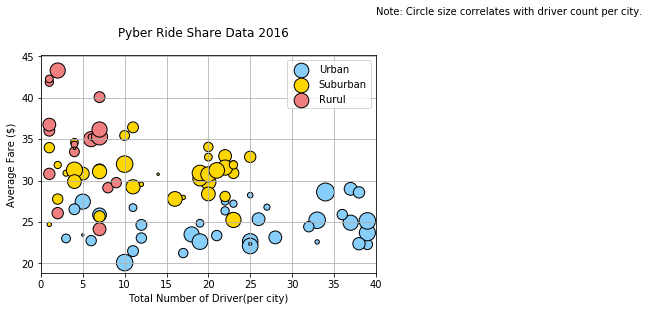

In [10]:
urban_df=summary_table_df.loc[summary_table_df['type']=='Urban']
suburban_df=summary_table_df.loc[summary_table_df['type']=='Suburban']
rural_df=summary_table_df.loc[summary_table_df['type']=='Rural']
x_axis = int((summary_table_df['Total Number of Driver'].max()) * 1.5)
y_axis = int((summary_table_df['Average Fare'].max())* 1.5 )
size=summary_table_df['Total Rides']**1.65
urban = plt.scatter((urban_df['Total Number of Driver']), (urban_df['Average Fare']), marker="o", facecolors="lightskyblue", 
                        edgecolors="black",s=size, alpha=1.0)
suburban = plt.scatter((suburban_df['Total Number of Driver']),(suburban_df['Average Fare']), marker="o", facecolors="gold", 
                        edgecolors="black",s=size, alpha=1.0)
rural = plt.scatter((rural_df['Total Number of Driver']), (rural_df['Average Fare']), marker="o", facecolors="lightcoral", 
                     edgecolors="black",s=size,alpha=1.0)
plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rurul"), loc="best")
plt.xlabel("Total Number of Driver(per city)")
plt.ylabel("Average Fare ($)")
plt.suptitle("Pyber Ride Share Data 2016")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.grid(True)
plt.xlim(0,40, 5)


#plt.ylim(0,y_axis)
#plt.xlim(0,x_axis)
#plt.show()

In [11]:
# Calculate Type Percents
total_percent = citymerge_df.groupby('type')
fare_percent = total_percent['fare'].sum()/citymerge_df['fare'].sum()*100
ride_percent = total_percent['fare'].count()/citymerge_df['fare'].count()*100
driver_percent = total_percent['driver_count'].sum()/citymerge_df['driver_count'].sum()*100
total_percent = pd.DataFrame({"Fare %":fare_percent,"Ride %":ride_percent,"Driver %":driver_percent}).reset_index()
total_percent = total_percent.rename(columns={"type":"City Type"})
total_percent.round(1)

,City Type,Fare %,Ride %,Driver %
0,Rural,6.8,5.3,0.8
1,Suburban,30.5,26.3,12.5
2,Urban,62.7,68.4,86.7


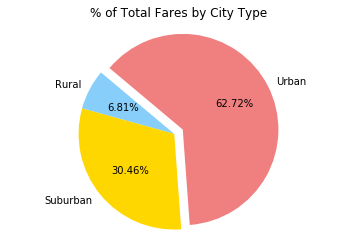

In [16]:
# Build Pie Chart
labels = total_percent["City Type"]
sizes = total_percent["Fare %"]
colors = ["lightskyblue","gold","lightcoral"]
explode = (0,0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=140)
plt.axis("equal")
#plt.legend(loc = "upper right")
plt.title("% of Total Fares by City Type")
plt.show()

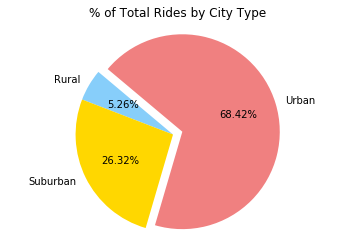

In [13]:
# Calculate Ride Percents
# Build Pie Chart
labels = total_percent["City Type"]
sizes = total_percent["Ride %"]
colors = ["lightskyblue","gold","lightcoral"]
explode = (0,0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

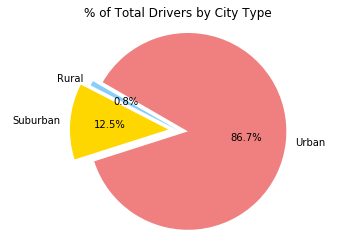

In [14]:
# % of Total Drivers by City Type

labels = total_percent["City Type"]
sizes = total_percent["Driver %"]
colors = ["lightskyblue","gold","lightcoral"]
explode = (0,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()